# ANALYSIS AND PREDICTION OF LAPTOP PRICES

### DATASET OVERVIEW
This dataset provides detailed information on various laptop models, including specifications, pricing, and user feedback. It is designed to assist in analysis related to laptop features, price comparison, brand
popularity, and customer satisfaction.

# IMPORTING LIBRARIES

In [5]:
# imports pandas library
import pandas as pd

# import numpy library for working with arrays
import numpy as np

# imports seaborn library
import seaborn as sns

import matplotlib.pyplot as plt

from scipy import stats



# IMPORTING THE FILE

In [6]:
from google.colab import files
uploaded = files.upload()

Saving laptopPrice.csv to laptopPrice (1).csv


# READING THE CSV FILE INTO A DATAFRAME

In [7]:
df = pd.read_csv("laptopPrice.csv") # reading the dataset into a dataframe

# DATA EXPLORATION

In [8]:
df.head() # displays the dataframe

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [9]:
# the shape of the data
print(df.shape)

(823, 19)


In [10]:
df["weight"].unique()

array(['Casual', 'ThinNlight', 'Gaming'], dtype=object)

In [11]:
# info of the  dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

In [15]:
# describing the dataset
df.describe()

,Price,Number of Ratings,Number of Reviews
count,823.000000,823.000000,823.000000
mean,76745.177400,315.301337,37.609964
std,45101.790525,1047.382654,121.728017
min,16990.000000,0.000000,0.000000
25%,46095.000000,0.000000,0.000000
50%,64990.000000,17.000000,2.000000
75%,89636.000000,139.500000,18.000000
max,441990.000000,15279.000000,1947.000000


## DATA VISUALIZATION

- Visualization some categorical columns using countplot to show their distribution

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'ASUS'),
  Text(1, 0, 'Lenovo'),
  Text(2, 0, 'acer'),
  Text(3, 0, 'Avita'),
  Text(4, 0, 'HP'),
  Text(5, 0, 'DELL'),
  Text(6, 0, 'MSI'),
  Text(7, 0, 'APPLE')])

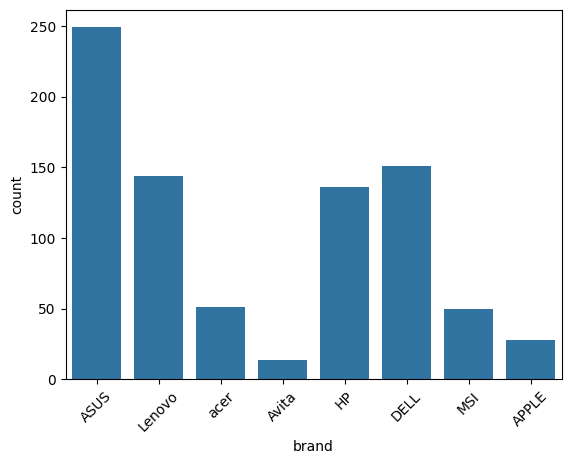

In [16]:
sns.countplot(x="brand", data=df)
# Rotating x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Core i3'),
  Text(1, 0, 'Core i5'),
  Text(2, 0, 'Celeron Dual'),
  Text(3, 0, 'Ryzen 5'),
  Text(4, 0, 'Core i7'),
  Text(5, 0, 'Core i9'),
  Text(6, 0, 'M1'),
  Text(7, 0, 'Pentium Quad'),
  Text(8, 0, 'Ryzen 3'),
  Text(9, 0, 'Ryzen 7'),
  Text(10, 0, 'Ryzen 9')])

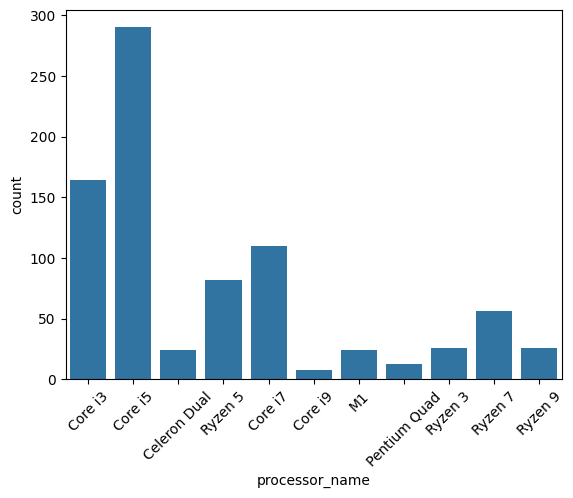

In [17]:
sns.countplot(x="processor_name", data=df)
# Rotating x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

([0, 1, 2], [Text(0, 0, 'Intel'), Text(1, 0, 'AMD'), Text(2, 0, 'M1')])

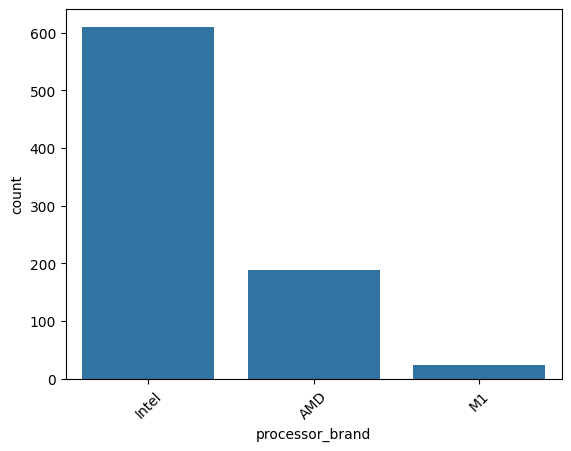

In [18]:
sns.countplot(x="processor_brand", data=df)
# Rotating x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

([0, 1], [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

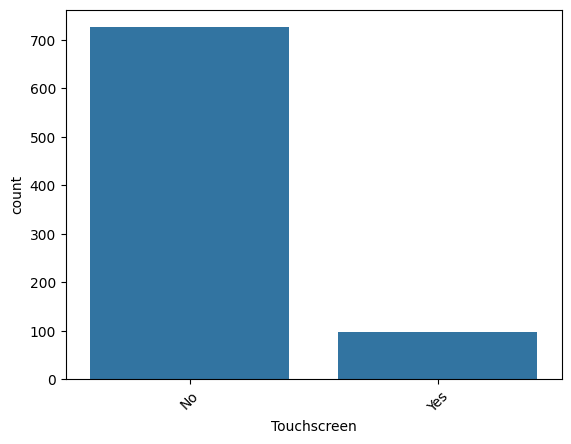

In [19]:
sns.countplot(x="Touchscreen", data=df)
# Rotating x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

([0, 1], [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

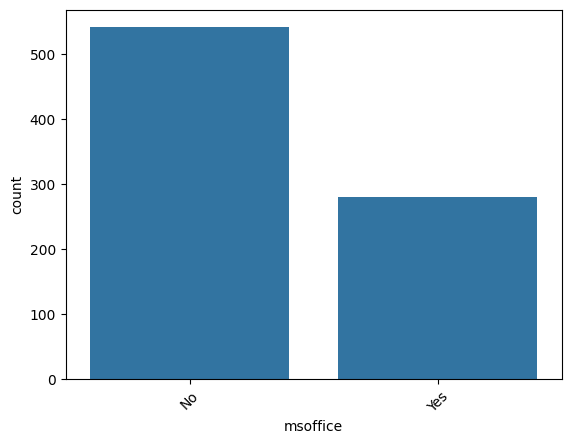

In [20]:
sns.countplot(x="msoffice", data=df)
# Rotating x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

([0, 1, 2], [Text(0, 0, 'Windows'), Text(1, 0, 'DOS'), Text(2, 0, 'Mac')])

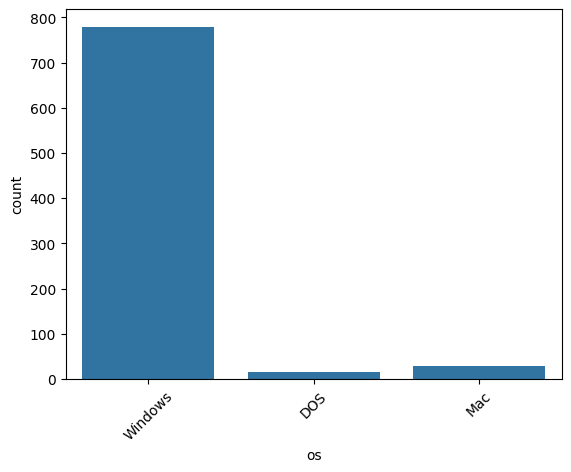

In [21]:
sns.countplot(x="os", data=df)
# Rotating x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

([0, 1, 2],
 [Text(0, 0, 'Casual'), Text(1, 0, 'ThinNlight'), Text(2, 0, 'Gaming')])

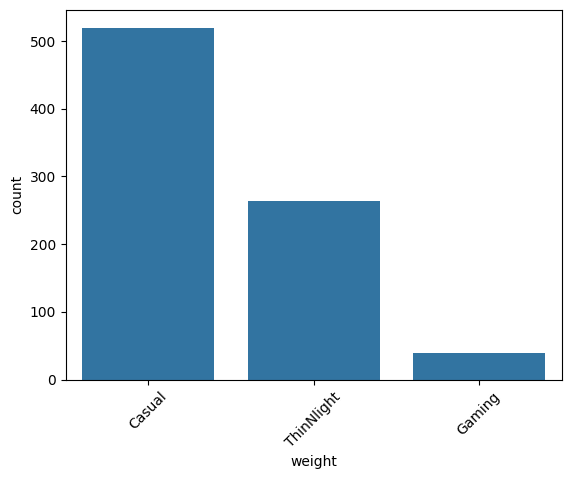

In [22]:
sns.countplot(x="weight", data=df)
# Rotating x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

## DATA PREPROCESSING

#### The percentage of missing values in each columns are;

In [23]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage})
missing_data

,Missing Values,Percentage (%)
brand,0,0.0
processor_brand,0,0.0
processor_name,0,0.0
processor_gnrtn,0,0.0
ram_gb,0,0.0
ram_type,0,0.0
ssd,0,0.0
hdd,0,0.0
os,0,0.0
os_bit,0,0.0


In [24]:
df.duplicated().sum()

np.int64(21)

In [25]:
df[df.duplicated()]


,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
13,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,22990,3 stars,0,0
45,ASUS,Intel,Core i3,11th,8 GB,DDR4,256 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,45990,4 stars,816,147
125,ASUS,Intel,Core i3,10th,4 GB,DDR4,512 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,40990,4 stars,4008,519
182,DELL,Intel,Core i3,11th,4 GB,DDR4,256 GB,1024 GB,Windows,64-bit,0 GB,ThinNlight,1 year,No,Yes,43590,3 stars,0,0
265,ASUS,Intel,Core i5,11th,16 GB,DDR4,512 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,59990,3 stars,0,0
352,ASUS,Intel,Core i5,11th,8 GB,LPDDR4X,512 GB,0 GB,Windows,64-bit,0 GB,ThinNlight,No warranty,No,No,84990,3 stars,0,0
375,ASUS,Intel,Core i5,11th,8 GB,LPDDR4X,512 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,Yes,No,99990,3 stars,0,0
391,Avita,Intel,Core i5,7th,8 GB,DDR4,512 GB,0 GB,Windows,64-bit,0 GB,ThinNlight,No warranty,No,No,65556,3 stars,0,0
393,Avita,Intel,Core i5,7th,8 GB,DDR4,512 GB,0 GB,Windows,64-bit,0 GB,ThinNlight,No warranty,No,No,65556,3 stars,0,0
399,Avita,Intel,Core i5,8th,8 GB,DDR4,512 GB,0 GB,Windows,64-bit,0 GB,ThinNlight,No warranty,No,No,73063,3 stars,17,3


In [26]:
df = df.drop_duplicates()

In [27]:
# the shape of the data
print(df.shape)

(802, 19)


### Detecting Outliers using Z-score

In [28]:
# Set the threshold for Z-score (commonly used value is 3)
threshold = 3

# Initialize an empty list to store column names with outliers
columns_with_outliers = []

# Loop through each numerical column to check for outliers
for column in df.select_dtypes(include=[np.number]).columns:  # Select numerical columns
    column_mean = df[column].mean()  # Mean of the column
    column_std = df[column].std()    # Standard deviation of the column

    # Calculate the Z-scores for each value in the column
    z_scores = (df[column] - column_mean) / column_std

    # Detect the outliers based on the threshold
    outliers = df[np.abs(z_scores) > threshold]

    # If outliers are detected, add the column to the list
    if not outliers.empty:
        columns_with_outliers.append(column)

# Display the list of columns that have outliers
if columns_with_outliers:
    print("Columns with outliers detected based on Z-score threshold:")
    for col in columns_with_outliers:
        print(col)
else:
    print("No outliers detected in any numerical columns.")

Columns with outliers detected based on Z-score threshold:
Price
Number of Ratings
Number of Reviews


### Visualization the Columns with outliers using boxplot

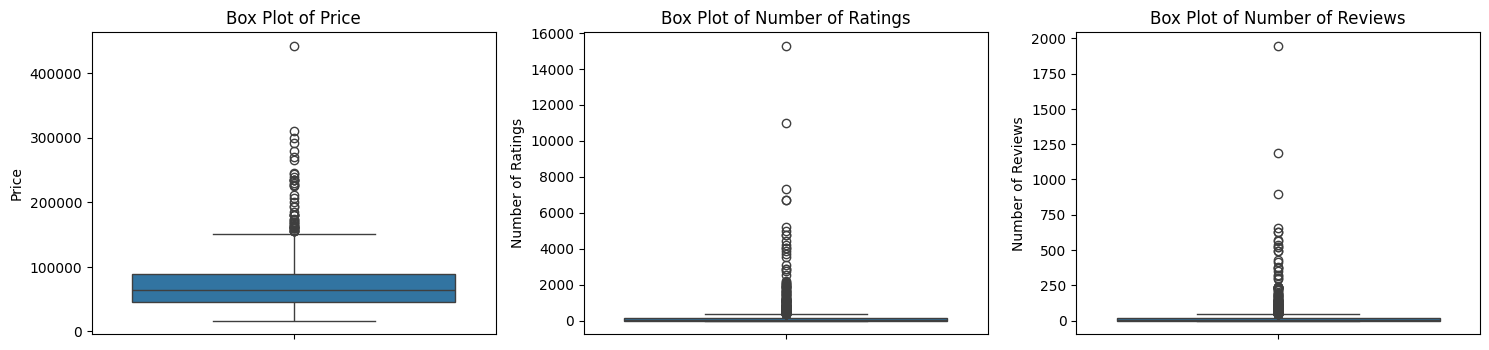

In [29]:
# Setting up the figure size for better visibility
plt.figure(figsize=(15, 10))

# Creating a box plot for each column with outliers
for i, col in enumerate(columns_with_outliers):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()

plt.show()

### Handling the Outliers using Interquartile Range Technique (IQR)

In [30]:
# Loop through each column in the list of columns with outliers
for column in columns_with_outliers:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate the IQR
    IQR = Q3 - Q1

    # Determine the outlier range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the column median
    median = df[column].median()
    df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = median

# Display the DataFrame to check the changes
df.tail()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
818,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,135990,3 stars,0,0
819,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,144990,3 stars,0,0
820,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,149990,3 stars,0,0
821,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,142990,3 stars,0,0
822,Lenovo,AMD,Ryzen 5,10th,8 GB,DDR4,512 GB,0 GB,DOS,64-bit,0 GB,ThinNlight,No warranty,No,No,57490,4 stars,18,4


### Saving the cleaned data set after handling the missing values and outliers

In [ ]:
# # The filename for the cleaned dataset
# output_filename = 'laptop_data_cleaned.csv'

# # Save the cleansed DataFrame to a CSV file
# df.to_csv(output_filename, index=False)

# print(f"Laptop cleaned data saved to {output_filename}")

Laptop cleaned data saved to laptop_data_cleaned.csv


### Bivariate Analysis

##### Price vs. Brand
- Analyzing Price vs. Brand is valuable for understanding brand positioning, price distribution, and customer perception.
- It reveals each brand's target market - whether premium or budget and provides insights into their pricing strategies.

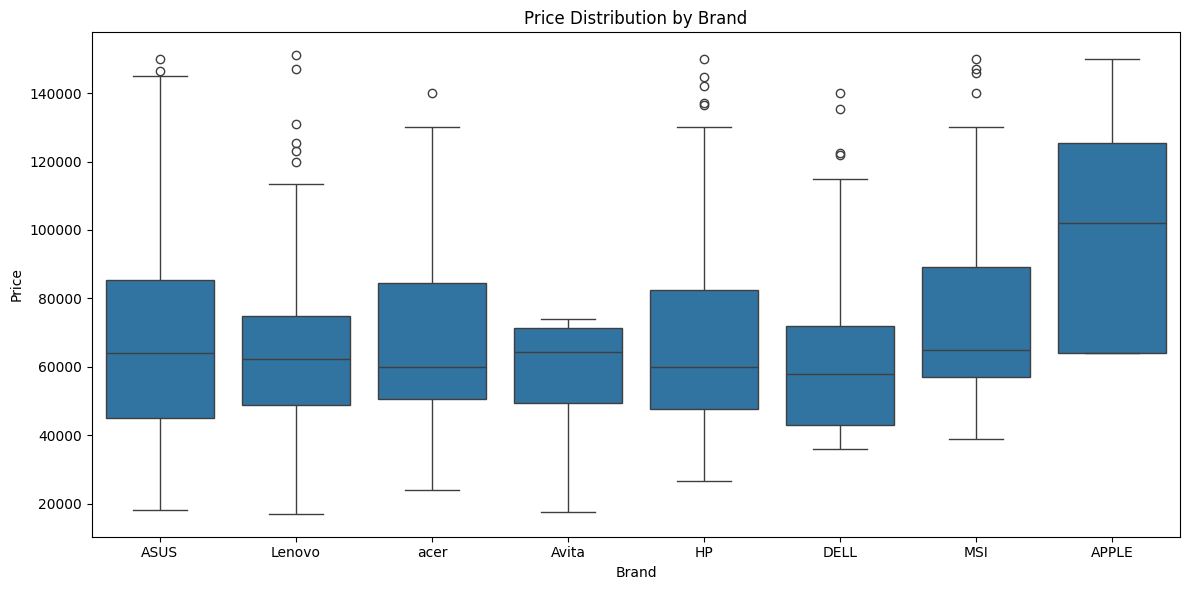

In [31]:
# Setting up the matplotlib figure
plt.figure(figsize=(12, 6))

# A box plot for Price vs Brand
sns.boxplot(x='brand', y='Price', data=df)

# Adding titles and labels
plt.title('Price Distribution by Brand')
plt.xlabel('Brand')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

### Skewness

Skewness of each numerical column:
Price                0.941447
Number of Ratings    2.533572
Number of Reviews    2.541074
dtype: float64


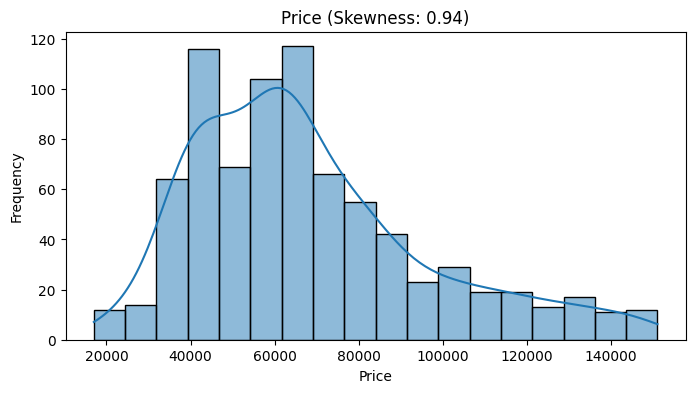

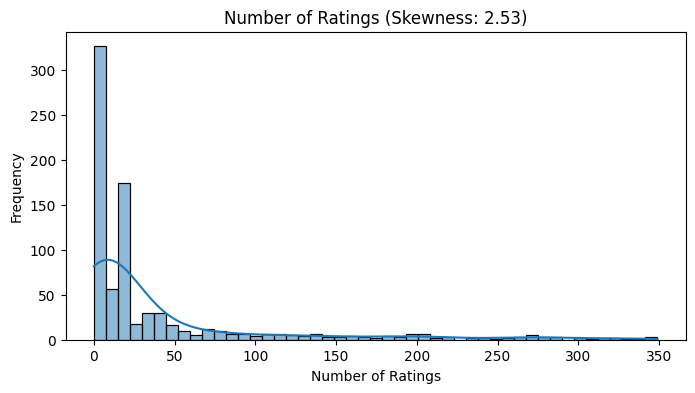

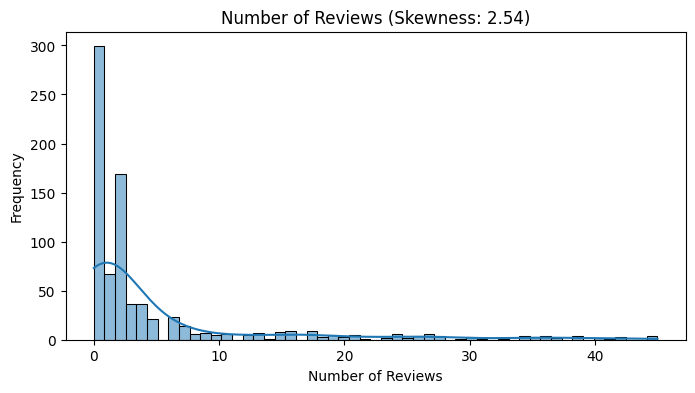

In [32]:
# Selecting the numerical columns
numerical_columns = df.select_dtypes(include=['number'])

# Calculating the skewness
skewness = numerical_columns.skew()
print("Skewness of each numerical column:")
print(skewness)

# Plotting each numerical column with skewness value as title
for column in numerical_columns.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f"{column} (Skewness: {skewness[column]:.2f})")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

#### Label Encoding

In [33]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Loop through each column with object data type (categorical columns)
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

# Display the updated DataFrame
print(df.head())

   brand  processor_brand  processor_name  processor_gnrtn  ram_gb  ram_type  \
0      1                1               1                0       2         1   
1      5                1               1                0       2         1   
2      5                1               1                0       2         1   
3      1                1               2                0       3         1   
4      1                1               0                7       2         1   

   ssd  hdd  os  os_bit  graphic_card_gb  weight  warranty  Touchscreen  \
0    0    1   2       1                0       0         3            0   
1    0    1   2       1                0       0         3            0   
2    0    1   2       1                0       0         3            0   
3    6    0   2       0                1       0         3            0   
4    0    3   2       1                0       0         3            0   

   msoffice  Price  rating  Number of Ratings  Number of Reviews  
0

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 802 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   brand              802 non-null    int64
 1   processor_brand    802 non-null    int64
 2   processor_name     802 non-null    int64
 3   processor_gnrtn    802 non-null    int64
 4   ram_gb             802 non-null    int64
 5   ram_type           802 non-null    int64
 6   ssd                802 non-null    int64
 7   hdd                802 non-null    int64
 8   os                 802 non-null    int64
 9   os_bit             802 non-null    int64
 10  graphic_card_gb    802 non-null    int64
 11  weight             802 non-null    int64
 12  warranty           802 non-null    int64
 13  Touchscreen        802 non-null    int64
 14  msoffice           802 non-null    int64
 15  Price              802 non-null    int64
 16  rating             802 non-null    int64
 17  Number of Ratings  80

#### Correlation

<Axes: >

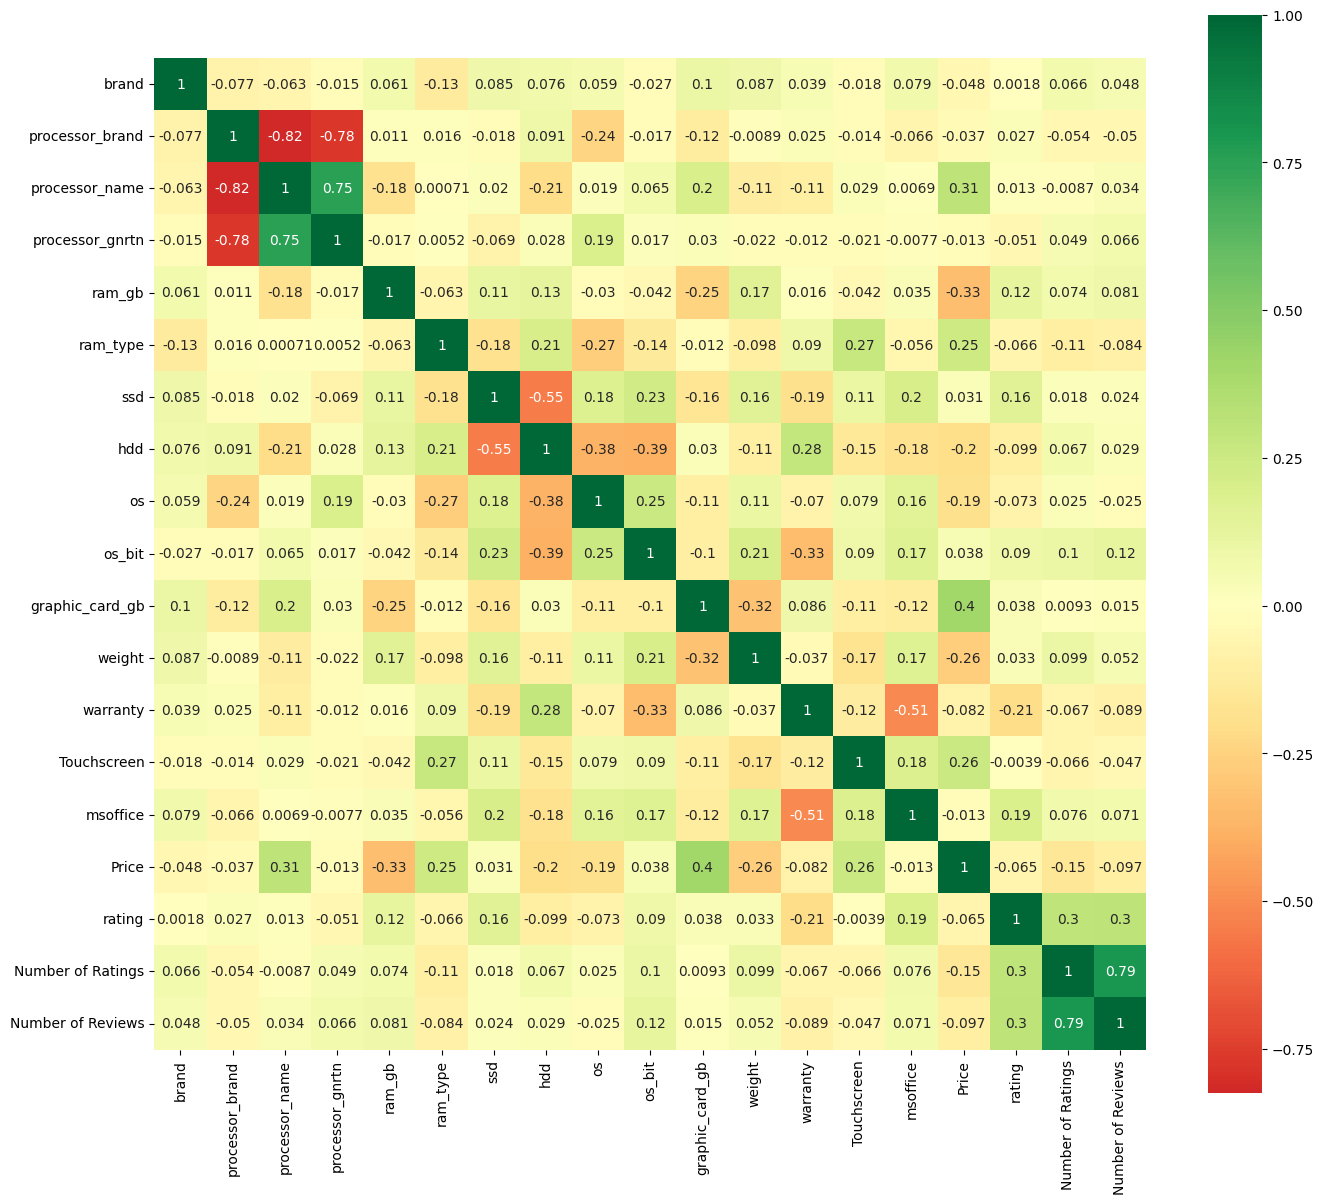

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16, 14))
# Plot the correlation matrix as a heatmap
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', center=0, square=True)

### Normalization/Standardization
- Scaling the features to ensure consistency across the dataset, especially important when features have different ranges.

In [36]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Feature Scaling: Normalization
min_max_scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[['ram_gb', 'weight']] = min_max_scaler.fit_transform(df[['ram_gb', 'weight']])

print("Normalized Data:")
print(df_normalized)

# Feature Scaling: Standardization
standard_scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[['ram_gb', 'weight']] = standard_scaler.fit_transform(df[['ram_gb', 'weight']])

print("\nStandardized Data:")
print(df_standardized)

Normalized Data:
     brand  processor_brand  processor_name  processor_gnrtn    ram_gb  \
0        1                1               1                0  0.666667   
1        5                1               1                0  0.666667   
2        5                1               1                0  0.666667   
3        1                1               2                0  1.000000   
4        1                1               0                7  0.666667   
..     ...              ...             ...              ...       ...   
818      1                0              10                7  0.666667   
819      1                0              10                7  0.666667   
820      1                0              10                7  0.666667   
821      1                0              10                7  0.666667   
822      5                0               8                0  1.000000   

     ram_type  ssd  hdd  os  os_bit  graphic_card_gb  weight  warranty  \
0           1    0  

### Feature Engineering

In [37]:
# 1. Total Storage (combining SSD and HDD)
df['total_storage_gb'] = df['ssd'] + df['hdd']

# 2. Price per GB of RAM
df['price_per_gb_ram'] = df['Price'] / df['ram_gb']

# 3. Price per GB of Total Storage
df['price_per_gb_storage'] = df['Price'] / df['total_storage_gb']

# Display the updated DataFrame with new features
print("Updated DataFrame with new features:")
print(df[['brand', 'ram_gb', 'ssd', 'hdd', 'total_storage_gb', 'Price', 'price_per_gb_ram', 'price_per_gb_storage']])

Updated DataFrame with new features:
     brand  ram_gb  ssd  hdd  total_storage_gb   Price  price_per_gb_ram  \
0        1       2    0    1                 1   34649      17324.500000   
1        5       2    0    1                 1   38999      19499.500000   
2        5       2    0    1                 1   39999      19999.500000   
3        1       3    6    0                 6   69990      23330.000000   
4        1       2    0    3                 3   26990      13495.000000   
..     ...     ...  ...  ...               ...     ...               ...   
818      1       2    1    0                 1  135990      67995.000000   
819      1       2    1    0                 1  144990      72495.000000   
820      1       2    1    0                 1  149990      74995.000000   
821      1       2    1    0                 1  142990      71495.000000   
822      5       3    6    0                 6   57490      19163.333333   

     price_per_gb_storage  
0            34649.000

In [41]:
# Check for infinite values and replace them with NaN
df.replace([float('inf'), float('-inf')], pd.NA, inplace=True)
df.dropna(inplace=True)  # Remove rows with NaN after replacement

# MODEL BULDING

#### Linear Regression Model
To predict the price of laptops based on their specifications, regression models are the best option since price is a continuous variable. These models establish a baseline by illustrating the relationship between features and price.


In [42]:
# Dropping price since as the dependent variable
X = df.drop('Price', axis=1)  # Features
y = df['Price']  # Target variable

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
from sklearn.linear_model import LinearRegression
# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [45]:
# Make predictions on the test set
y_pred = model.predict(X_test)

#### Evaluating the model

In [46]:
# Importing necessary metrics
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate on training set
y_train_pred = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))  # Calculate RMSE
train_mse = mean_squared_error(y_train, y_train_pred)  # Still keep MSE for reference
train_r2 = r2_score(y_train, y_train_pred)

# Evaluate on test set
y_test_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))  # Calculate RMSE
test_mse = mean_squared_error(y_test, y_test_pred)  # Still keep MSE for reference
test_r2 = r2_score(y_test, y_test_pred)

# Print the results
print("Training Set Performance:")
print(f"RMSE: {train_rmse}, MSE: {train_mse}, R²: {train_r2}")

print("\nTest Set Performance:")
print(f"RMSE: {test_rmse}, MSE: {test_mse}, R²: {test_r2}")

Training Set Performance:
RMSE: 5236.718434107721, MSE: 27423219.958123624, R²: 0.9604159623435048

Test Set Performance:
RMSE: 4134.195375457695, MSE: 17091571.40245579, R²: 0.970392663649912


### Visualizing the Linear Regression Model

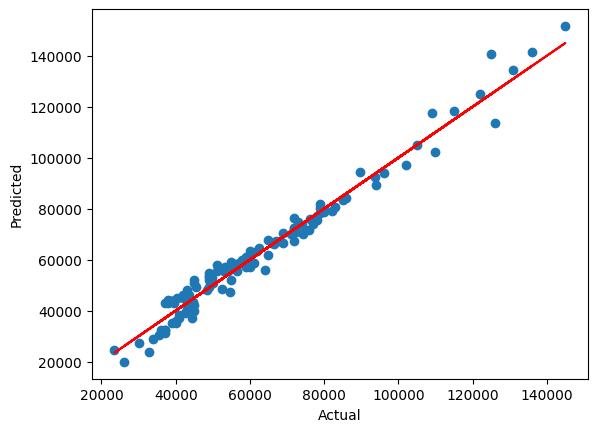

In [47]:
#Visualize MLR-trained model
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Plotting the identity line
plt.plot(y_test, y_test, color='red')
plt.show()

#### Histogram showing  the mean of the predicted price

The mean of the predicted price is: $62754.75


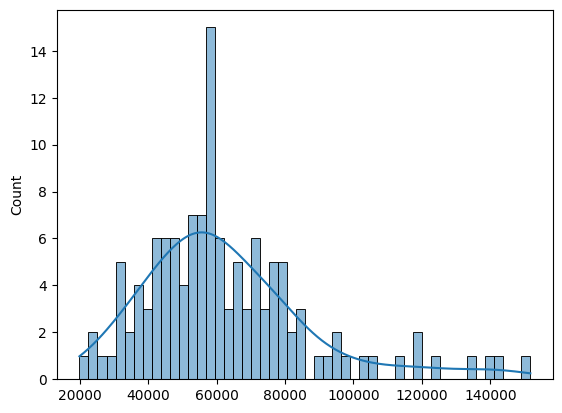

In [48]:
sns.histplot(x=(y_pred), kde=True, bins=50);

mean_predicted_value = np.mean(y_pred)

print(f"The mean of the predicted price is: ${mean_predicted_value:.2f}".format())

### Model Evaluation Summary

Based on the nature of the dataset, predicting a continuous numerical value (Price), the most suitable machine learning evaluation metric is Mean Squared Error (MSE).

#### The model's performance metrics are as follows:
- Root Mean Squared Error (RMSE): Approximately 5236.72 for the training set and 4134.20 for the test set, indicating the model performs better on unseen data compared to the training data.
- Mean Squared Error (MSE): 27,423,219.96 for the training set compared to 17,091,571.40 for the test set, suggesting larger prediction errors in the training set, which may indicate potential overfitting.
- R² Score: 0.9604 for the training set and 0.9704 for the test set, both close to 1, indicating the model explains about 97% of the variance in the target variable in both datasets.

### DECISION TREE REGRESSOR MODEL
Captures non-linear relationships missed by linear regression and accommodates both categorical and continuous variables.


In [49]:
from sklearn.tree import DecisionTreeRegressor

# Initialize Decision Tree Regressor model
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Evaluate the Decision Tree model
decision_tree_r2 = r2_score(y_test, y_pred_decision_tree)
decision_tree_mse = mean_squared_error(y_test, y_pred_decision_tree)
decision_tree_rmse = np.sqrt(decision_tree_mse)

print(f'Decision Tree R-squared: {decision_tree_r2}')
print(f'Decision Tree Mean Squared Error: {decision_tree_mse}')
print(f'Decision Tree RMSE: {decision_tree_rmse}')


Decision Tree R-squared: 0.9359481367703945
Decision Tree Mean Squared Error: 36975531.365079366
Decision Tree RMSE: 6080.750888260377


### RIDGE & LASSO REGRESSION MODELS
These are regularization techniques that address multicollinearity and prevent overfitting, with Lasso also aiding in feature selection by shrinking some coefficients to zero.


In [50]:
from sklearn.linear_model import Ridge

# Initialize Ridge Regression model
ridge_model = Ridge(random_state=42)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the Ridge model
ridge_r2 = r2_score(y_test, y_pred_ridge)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_rmse = np.sqrt(ridge_mse)

print(f'Ridge Regression R-squared: {ridge_r2}')
print(f'Ridge Regression Mean Squared Error: {ridge_mse}')
print(f'Ridge Regression RMSE: {ridge_rmse}')

Ridge Regression R-squared: 0.9710832147702202
Ridge Regression Mean Squared Error: 16692933.590521777
Ridge Regression RMSE: 4085.698666142888


In [51]:
from sklearn.linear_model import Lasso

# Initialize Lasso Regression model
lasso_model = Lasso(random_state=42)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the Lasso model
lasso_r2 = r2_score(y_test, y_pred_lasso)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_rmse = np.sqrt(lasso_mse)

print(f'Lasso Regression R-squared: {lasso_r2}')
print(f'Lasso Regression Mean Squared Error: {lasso_mse}')
print(f'Lasso Regression RMSE: {lasso_rmse}')

Lasso Regression R-squared: 0.9704217939687024
Lasso Regression Mean Squared Error: 17074755.20130564
Lasso Regression RMSE: 4132.161081238924


### GRADIANT BOOSTING REGRESSOR MODEL
This is an ensemble method that enhances accuracy by combining multiple decision trees, effective in identifying complex patterns in data.

In [52]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize Gradient Boosting Regressor model
gradient_boosting_model = GradientBoostingRegressor(random_state=42)
gradient_boosting_model.fit(X_train, y_train)
y_pred_gradient_boosting = gradient_boosting_model.predict(X_test)

# Evaluate the Gradient Boosting model
gradient_boosting_r2 = r2_score(y_test, y_pred_gradient_boosting)
gradient_boosting_mse = mean_squared_error(y_test, y_pred_gradient_boosting)
gradient_boosting_rmse = np.sqrt(gradient_boosting_mse)

print(f'Gradient Boosting R-squared: {gradient_boosting_r2}')
print(f'Gradient Boosting Mean Squared Error: {gradient_boosting_mse}')
print(f'Gradient Boosting RMSE: {gradient_boosting_rmse}')

Gradient Boosting R-squared: 0.9892048052174042
Gradient Boosting Mean Squared Error: 6231794.723053706
Gradient Boosting RMSE: 2496.3562892851864


### OVERALL MODEL PERFORMANCE
🌟 Best Overall Model: Gradient Boosting
Gradient Boosting achieved the highest R-squared value of 0.9892, explaining 98.92% of the variance in the price data. It also has the lowest MSE (6,230,000) and RMSE (2,496.36), making it the most accurate model overall.

🌳 Strong Competitor: Ridge Regression
Ridge Regression follows closely with an R-squared of 0.9711, slightly outperforming other linear models. However, its MSE (16,690,000) and RMSE (4,085.70) are notably higher than those of Gradient Boosting.

⚖️ Moderate Performance: Lasso & Linear Regression
Lasso Regression has an R² of 0.9704, with similar error metrics to Linear Regression, indicating comparable performance.

Linear Regression also yields an R² of 0.9704, but with a slightly higher RMSE (4,134.20) and MSE (17,090,000), showing lower prediction accuracy than Ridge or Gradient Boosting.

🪵 Lower Accuracy: Decision Tree
The Decision Tree model has the lowest R-squared (0.9359) and highest error metrics (RMSE: 6,080.75, MSE: 36,980,000). This suggests potential overfitting and weaker generalization.



### CONCLUSION
Gradient Boosting is the best model for price prediction, combining accuracy and complexity. Decision Tree performs well but may overfit. Ridge and Lasso offer good interpretability, while Linear Regression is the least effective. Choosing a model depends on the balance between accuracy and interpretability.

In [51]:
import joblib

joblib.dump(model, 'laptop_price_model.pkl')

['laptop_price_model.pkl']